In [1]:
import numpy as np
import sklearn
import scipy
import pandas
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import itertools

In [2]:
# 平坦
y = np.random.exponential(2,1000)
x = np.random.normal(loc=1, scale=1, size=1000)

In [3]:
# 全体的に傾向あり+方向
y = np.random.exponential(2,1000)
x = np.random.normal(loc=0, scale=1, size=1000) + (y/10)

In [4]:
# 平坦 + 異常
y = np.random.exponential(2,1000)
x = np.random.normal(loc=0, scale=1, size=1000)
x = np.append(x, np.random.normal(loc=1.5, scale=0.5, size=100))
y = np.append(y, np.random.normal(loc=7, scale=0.3, size=100))

In [5]:
# 全体傾向あり + 異常
y = np.random.exponential(2,1000)
x = np.random.normal(loc=0, scale=1, size=1000)
x = np.append(x, np.random.normal(loc=1.5, scale=0.5, size=100))
y = np.append(y, np.random.normal(loc=7, scale=0.3, size=100))
x = x + (y/10)

In [6]:
# 平坦 + 平坦異常 相関低い
y = np.random.exponential(2,1000)
x = np.random.normal(loc=0, scale=1, size=1000)
x = np.append(x, np.random.normal(loc=0, scale=1, size=100))
y = np.append(y, np.random.normal(loc=7, scale=0.3, size=100))

In [7]:
# 全体傾向あり + 逆異常 相関低い
y = np.random.exponential(2,1000)
x = np.random.normal(loc=0, scale=1, size=1000) + (y/10)
x = np.append(x, np.random.normal(loc=-1, scale=0.5, size=100))
y = np.append(y, np.random.normal(loc=7, scale=0.3, size=100))

0.0005155459255360428


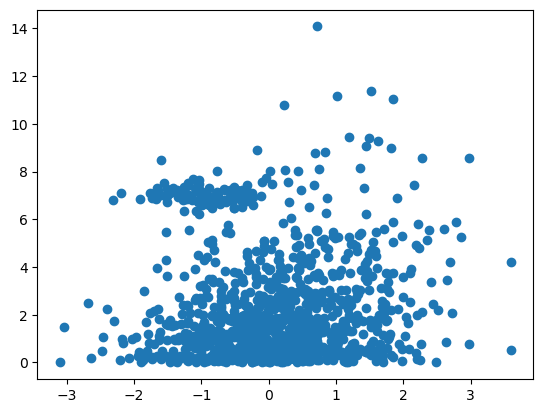

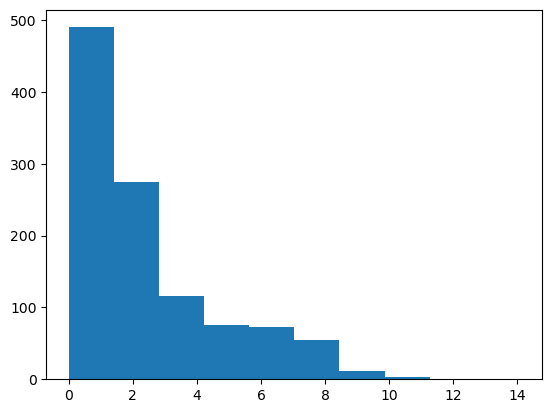

In [8]:
lr = LinearRegression()
lr.fit(x.reshape(-1,1), y)
print(lr.score(x.reshape(-1,1), y))
plt.scatter(x, y)
plt.show()
plt.hist(y)
plt.show()

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 14.]
1.0


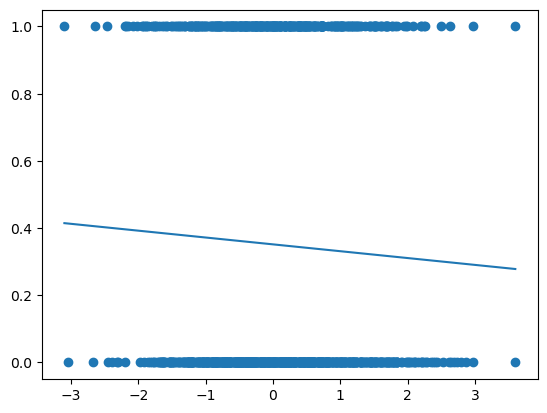

3.0


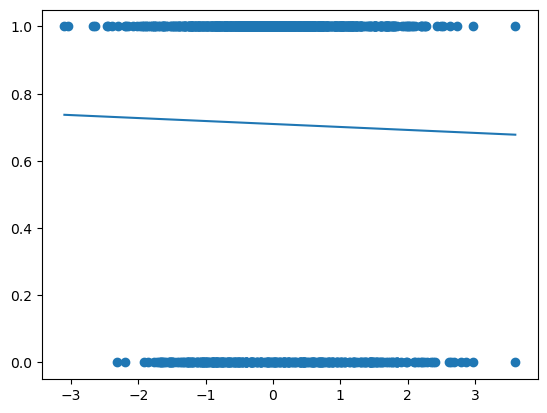

5.0


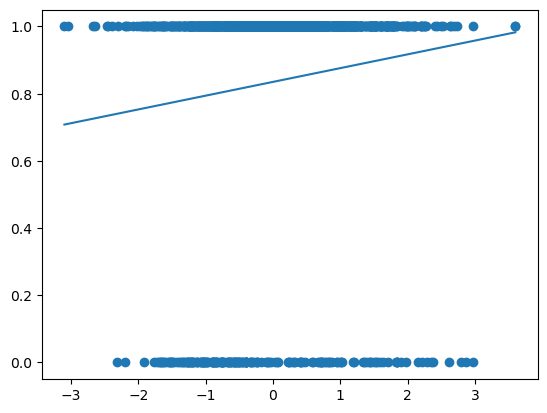

7.0


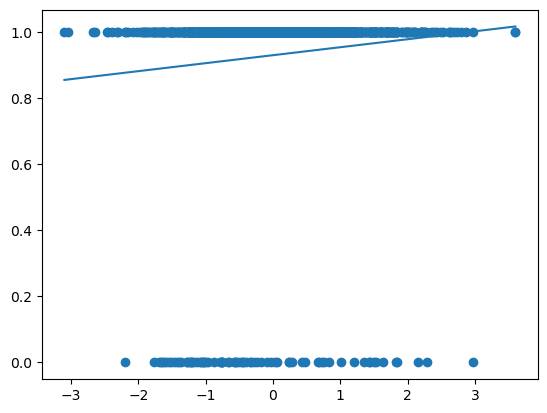

9.0


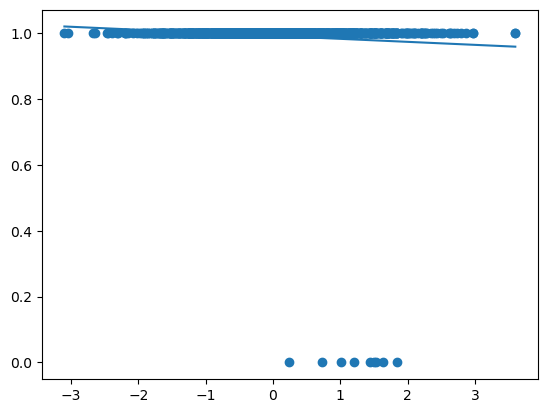

11.0


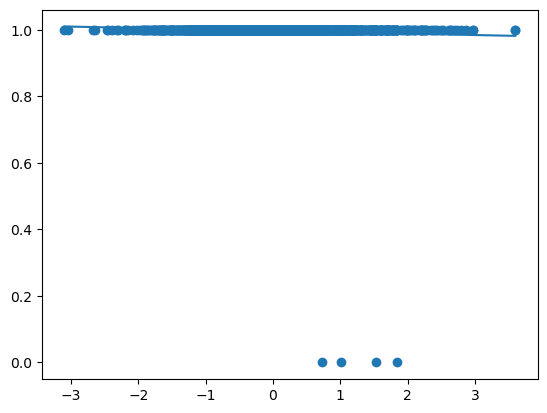

In [9]:
uniq = np.unique(np.floor(y))[1:]
print(uniq)
for k in itertools.islice(uniq, 0, None, int(len(uniq)/5)):
    print(k)
    y_k = np.where(y < k, 1, 0)
    plt.scatter(x, y_k)

    lr = LinearRegression()
    lr.fit(x.reshape(-1,1), y_k)
    a = lr.coef_
    b = lr.intercept_
    x_min = np.min(x)
    x_max = np.max(x)
    y_min = x_min*a + b
    y_max = x_max*a + b
    plt.plot([x_min, x_max], [y_min, y_max])

    plt.show()